In [1]:
import pandas as pd

# Load the clean enhanced dataset
df = pd.read_csv("supplier_risk_master_data_enhanced.csv")

# Preview first 5 rows
df.head()


,supplier_id,name,industry,location,supplier_size,product_supplied,on_time_delivery,defect_rate,payment_delay_days,escalation_count,penalty_count,contract_duration_months,renewal_status,cost_per_unit,business_criticality,risk_score,recommended_action
0,SUP-01001,Frazier-Harris,Electronics,Floydstad,Medium,Chips,77.4,2.46,3.0,1,1,34,Not Renewed,52.81,Low,91,Renew
1,SUP-01002,Kennedy-Long,Pharma,West Karen,Medium,Transport Services,78.1,0.55,6.0,1,0,35,Renewed,724.78,High,29,Terminate
2,SUP-01003,"Cantu, Bates and Quinn",Logistics,Lake Patricia,Medium,Vaccines,81.6,5.30,3.0,1,0,26,Renewed,846.30,Medium,63,Renegotiate
3,SUP-01004,Fox-Bauer,Electronics,New Cynthiaville,Medium,Chips,68.8,2.60,6.0,3,0,24,Renewed,19.42,High,20,Renegotiate
4,SUP-01005,Hernandez Group,Chemicals,Lake Alexandraside,Small,Transport Services,81.0,0.77,21.0,2,0,10,Not Renewed,711.10,High,77,Renew


In [4]:
# Count how many suppliers got each Recommended Action
df['recommended_action'].value_counts()



recommended_action
Renew          614
Renegotiate    419
Terminate      167
Name: count, dtype: int64

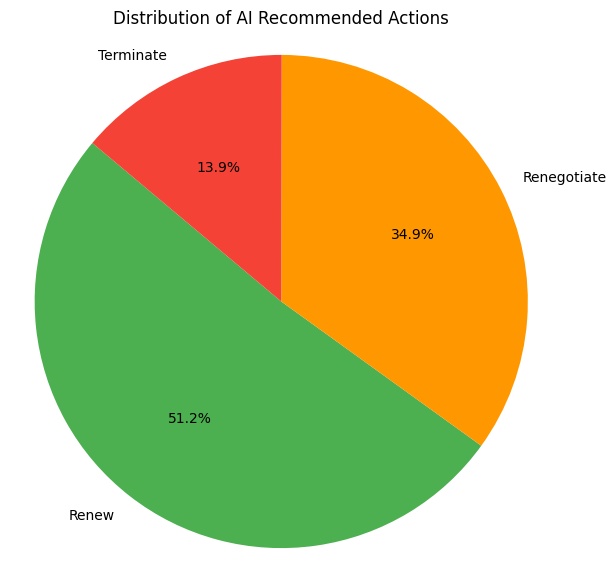

In [5]:
import matplotlib.pyplot as plt

# Plot pie chart of AI Recommended Actions
action_counts = df["recommended_action"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', startangle=140, colors=["#4CAF50", "#FF9800", "#F44336"])
plt.title("Distribution of AI Recommended Actions")
plt.axis("equal")  # Equal aspect ratio ensures the pie is a circle
plt.show()


In [2]:
import pandas as pd
import numpy as np

# Load realistic supplier dataset
df = pd.read_csv("supplier_risk_master_data_enhanced.csv")

# Select top suppliers based on risk_score
top_suppliers = df.sort_values("risk_score", ascending=False).head(4)["supplier_id"].tolist()

# Generate date range for 6 months
months = pd.date_range(start='2025-02-01', periods=6, freq='MS')

# Simulate monthly risk score (adding small noise to their original risk_score)
np.random.seed(42)
monthly_data = []
for supplier in top_suppliers:
    base_score = df[df['supplier_id'] == supplier]['risk_score'].values[0]
    for m in months:
        score = np.clip(base_score + np.random.normal(0, 6), 30, 130)
        monthly_data.append({
            "Supplier_ID": supplier,
            "Month": m,
            "Risk_Score": round(score, 2)
        })

monthly_risk_df = pd.DataFrame(monthly_data)

# Display the first few rows
print(monthly_risk_df.head())

# Generate alerts for high-risk scores (> 90)
alerts_df = monthly_risk_df[monthly_risk_df['Risk_Score'] > 90]

# Print alerts
for index, row in alerts_df.iterrows():
    print(f"⚠️ ALERT: Supplier {row['Supplier_ID']} has HIGH RISK of {row['Risk_Score']} in {row['Month'].strftime('%B %Y')}.")

# Save alerts
alerts_df.to_csv("monthly_supplier_alerts.csv", index=False)


  Supplier_ID      Month  Risk_Score
0   SUP-01496 2025-02-01       96.98
1   SUP-01496 2025-03-01       93.17
2   SUP-01496 2025-04-01       97.89
3   SUP-01496 2025-05-01      103.14
4   SUP-01496 2025-06-01       92.60
⚠️ ALERT: Supplier SUP-01496 has HIGH RISK of 96.98 in February 2025.
⚠️ ALERT: Supplier SUP-01496 has HIGH RISK of 93.17 in March 2025.
⚠️ ALERT: Supplier SUP-01496 has HIGH RISK of 97.89 in April 2025.
⚠️ ALERT: Supplier SUP-01496 has HIGH RISK of 103.14 in May 2025.
⚠️ ALERT: Supplier SUP-01496 has HIGH RISK of 92.6 in June 2025.
⚠️ ALERT: Supplier SUP-01496 has HIGH RISK of 92.6 in July 2025.
⚠️ ALERT: Supplier SUP-01493 has HIGH RISK of 103.48 in February 2025.
⚠️ ALERT: Supplier SUP-01493 has HIGH RISK of 98.6 in March 2025.
⚠️ ALERT: Supplier SUP-01493 has HIGH RISK of 91.18 in April 2025.
⚠️ ALERT: Supplier SUP-01493 has HIGH RISK of 97.26 in May 2025.
⚠️ ALERT: Supplier SUP-01493 has HIGH RISK of 91.22 in June 2025.
⚠️ ALERT: Supplier SUP-01493 has HIGH RISK 

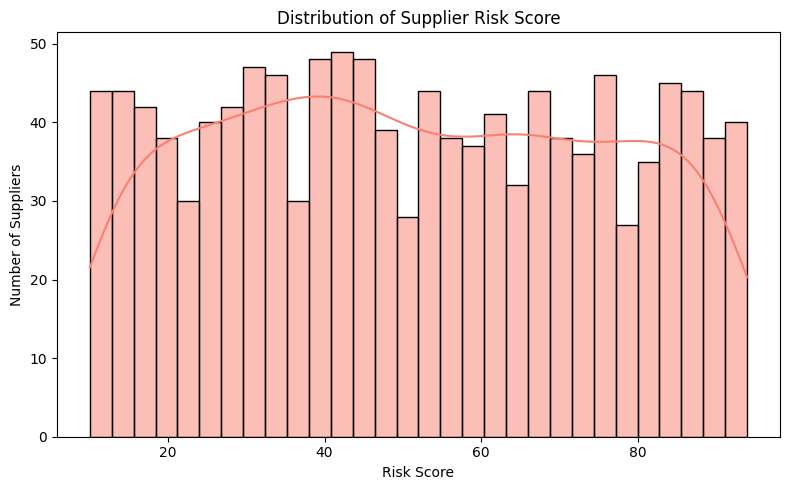

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Convert Risk_Score to numeric if needed
df = pd.read_csv("supplier_risk_master_data_enhanced.csv")
# Ensure 'Risk_Score' column exists before converting
if "risk_score" in df.columns:
    df["risk_score"] = pd.to_numeric(df["risk_score"], errors='coerce')
else:
    print("Warning: 'Risk_Score' column not found in the dataframe.")

# Plot again
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="risk_score", bins=30, kde=True, color="salmon", edgecolor="black")
plt.title("Distribution of Supplier Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Number of Suppliers")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17300\169077547.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(


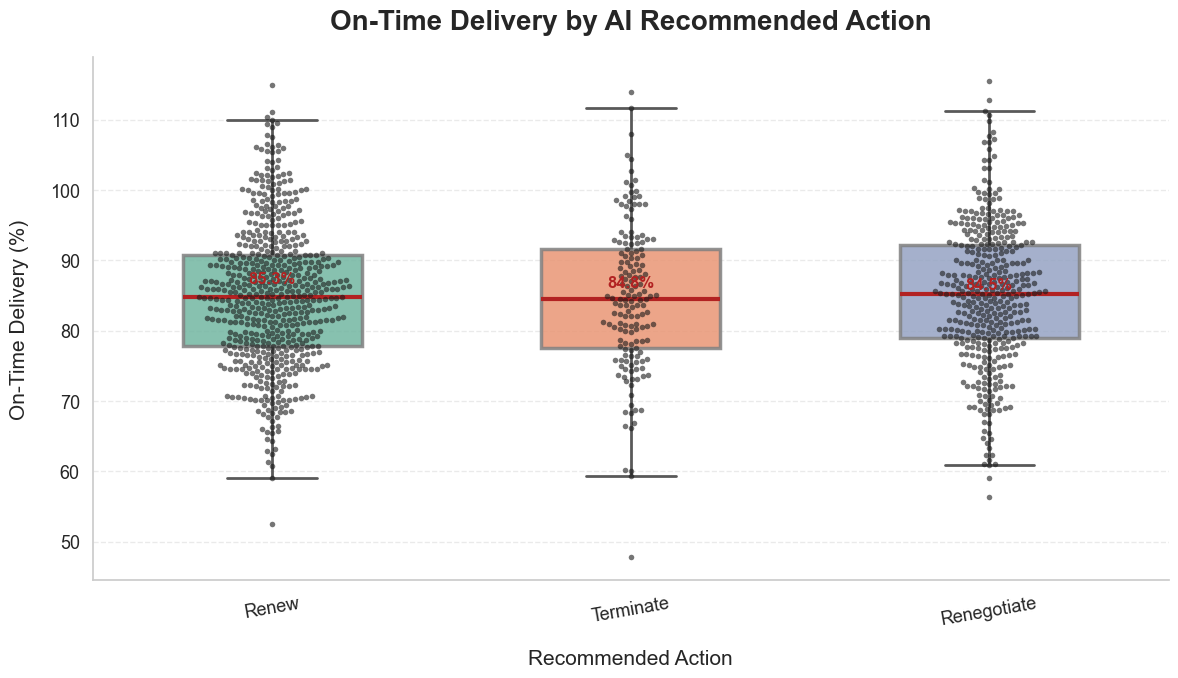

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values
plot_df = df.dropna(subset=['on_time_delivery', 'recommended_action'])

# Set a modern, clean style
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.15)

plt.figure(figsize=(12, 7))

# Draw boxplot with enhanced aesthetics
box = sns.boxplot(
    data=plot_df,
    x='recommended_action',
    y='on_time_delivery',
    palette='Set2',
    width=0.5,
    linewidth=2.5,
    fliersize=0,  # Hide outliers for clarity
    boxprops=dict(alpha=0.85, edgecolor='gray'),
    medianprops=dict(color='firebrick', linewidth=3),
    whiskerprops=dict(linewidth=2),
    capprops=dict(linewidth=2)
)

# Overlay swarmplot for individual points
sns.swarmplot(
    data=plot_df,
    x='recommended_action',
    y='on_time_delivery',
    color='k',
    size=4,
    alpha=0.6
)

# Add grid, titles, and labels
plt.title("On-Time Delivery by AI Recommended Action", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Recommended Action", fontsize=15, labelpad=15)
plt.ylabel("On-Time Delivery (%)", fontsize=15, labelpad=15)
plt.xticks(fontsize=13, rotation=10)
plt.yticks(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top/right spines for a cleaner look
sns.despine(top=True, right=True)

# Annotate median values on each box
medians = plot_df.groupby('recommended_action')['on_time_delivery'].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f"{median:.1f}%", ha='center', va='bottom', fontsize=12, color='firebrick', fontweight='bold')

plt.tight_layout()
plt.show()


In [12]:
# Select input features (X) based on your actual column names
X = df[[
    "on_time_delivery",
    "defect_rate",
    "payment_delay_days",      # ✅ Correct name from your data
    "escalation_count",
    "penalty_count",
    "cost_per_unit",
    "business_criticality"
]]

# Select the target variable (y)
y = df["recommended_action"]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the categorical feature 'business_criticality'
bc_le = LabelEncoder()
df['business_criticality_encoded'] = bc_le.fit_transform(df['business_criticality'])

# Feature Matrix (X)
X = df[[
    "on_time_delivery",
    "defect_rate",
    "payment_delay_days",
    "escalation_count",
    "penalty_count",
    "cost_per_unit",
    "business_criticality_encoded"   # use the encoded version
]]

# Encode target variable (y)
action_le = LabelEncoder()
y = action_le.fit_transform(df["recommended_action"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=action_le.classes_))



Accuracy: 0.5083333333333333

Classification Report:
               precision    recall  f1-score   support

 Renegotiate       0.46      0.31      0.37        84
       Renew       0.52      0.77      0.62       123
   Terminate       0.50      0.03      0.06        33

    accuracy                           0.51       240
   macro avg       0.50      0.37      0.35       240
weighted avg       0.50      0.51      0.46       240



C:\Users\HP\AppData\Local\Temp\ipykernel_17300\3119375490.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP\OneDrive\Desktop\Supplier risk\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


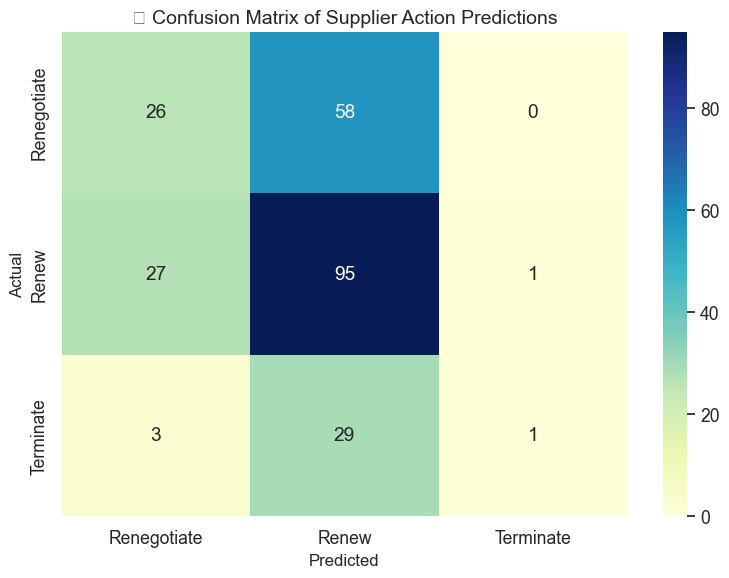

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = action_le.classes_

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.title("🔍 Confusion Matrix of Supplier Action Predictions", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17300\1329774345.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP\OneDrive\Desktop\Supplier risk\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


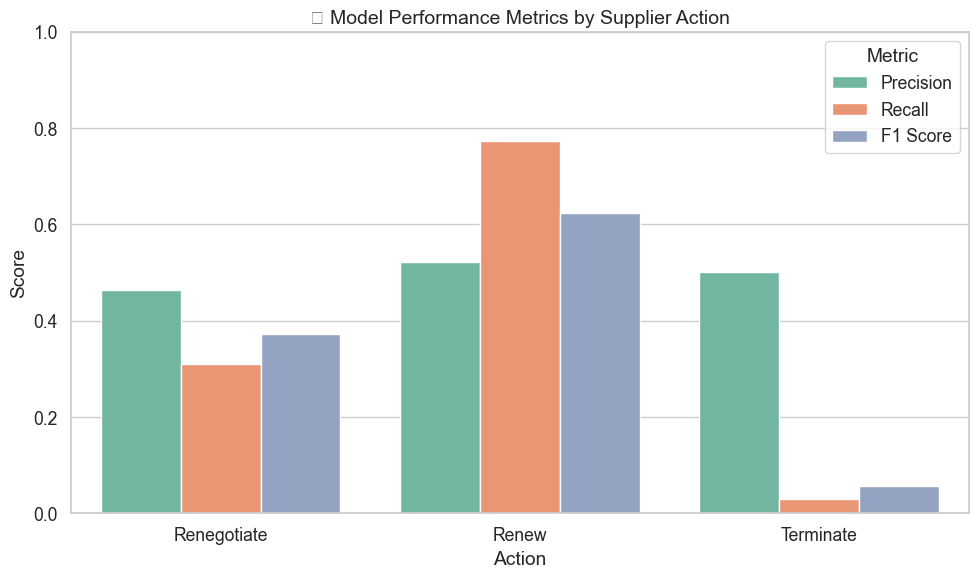

In [16]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Get metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2])

# Create DataFrame
metrics_df = pd.DataFrame({
    'Action': labels,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Melt for seaborn
metrics_melted = metrics_df.melt(id_vars='Action', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Action', y='Score', hue='Metric', data=metrics_melted, palette='Set2')
plt.title("📊 Model Performance Metrics by Supplier Action", fontsize=14)
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


In [17]:
# Predict Recommended_Action for all rows in df using the trained RandomForestClassifier
feature_cols = [
    "on_time_delivery",
    "defect_rate",
    "payment_delay_days",
    "escalation_count",
    "penalty_count",
    "cost_per_unit",
    "business_criticality"
]

# Predict using the trained classifier
df["predicted_action"] = action_le.inverse_transform(rf_clf.predict(X))

# Export to CSV
df.to_csv("supplier_risk_with_predictions.csv", index=False)
print("✅ Exported: supplier_risk_with_predictions.csv")


✅ Exported: supplier_risk_with_predictions.csv


In [19]:
df[["supplier_id", "recommended_action", "predicted_action"]].head()



,supplier_id,recommended_action,predicted_action
0,SUP-01001,Renew,Renew
1,SUP-01002,Terminate,Terminate
2,SUP-01003,Renegotiate,Renegotiate
3,SUP-01004,Renegotiate,Renew
4,SUP-01005,Renew,Renew


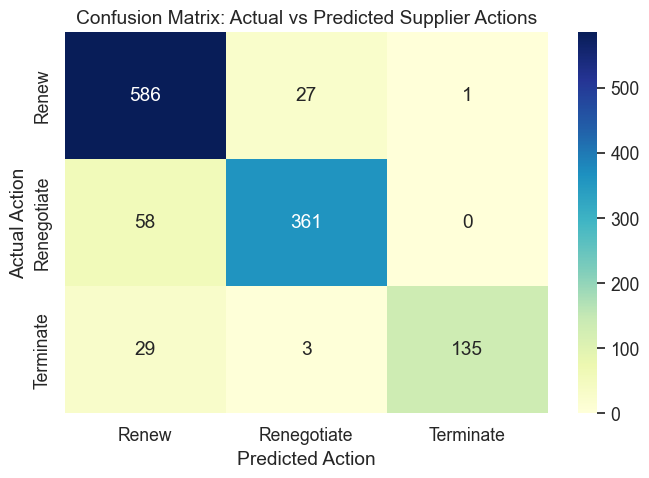

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(df["recommended_action"], df["predicted_action"], labels=["Renew", "Renegotiate", "Terminate"])

# Create a labeled heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Renew", "Renegotiate", "Terminate"],
            yticklabels=["Renew", "Renegotiate", "Terminate"])
plt.xlabel("Predicted Action")
plt.ylabel("Actual Action")
plt.title("Confusion Matrix: Actual vs Predicted Supplier Actions")
plt.tight_layout()
plt.show()


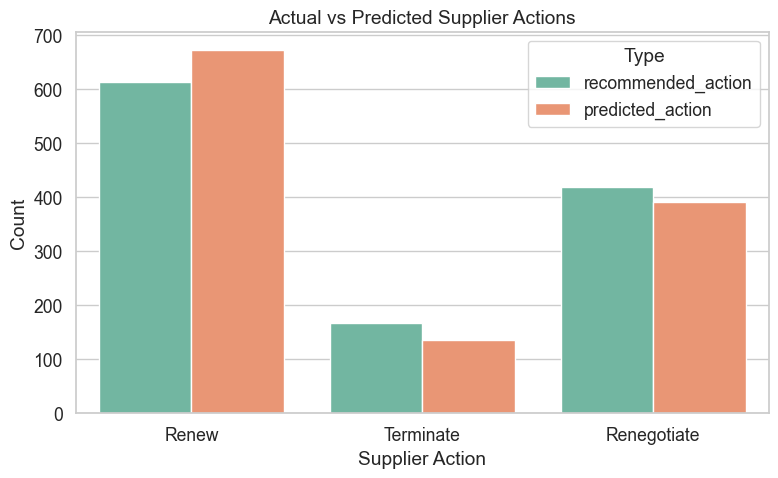

In [21]:
# Melt data for easy side-by-side bar comparison
comparison_df = df[["recommended_action", "predicted_action"]].melt(var_name="Type", value_name="Action")

plt.figure(figsize=(8, 5))
sns.countplot(x="Action", hue="Type", data=comparison_df, palette="Set2")
plt.title("Actual vs Predicted Supplier Actions")
plt.xlabel("Supplier Action")
plt.ylabel("Count")
plt.legend(title="Type")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17300\2624388303.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(end=pd.Timestamp.today(), periods=6, freq='M')
C:\Users\HP\AppData\Local\Temp\ipykernel_17300\2624388303.py:82: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP\OneDrive\Desktop\Supplier risk\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


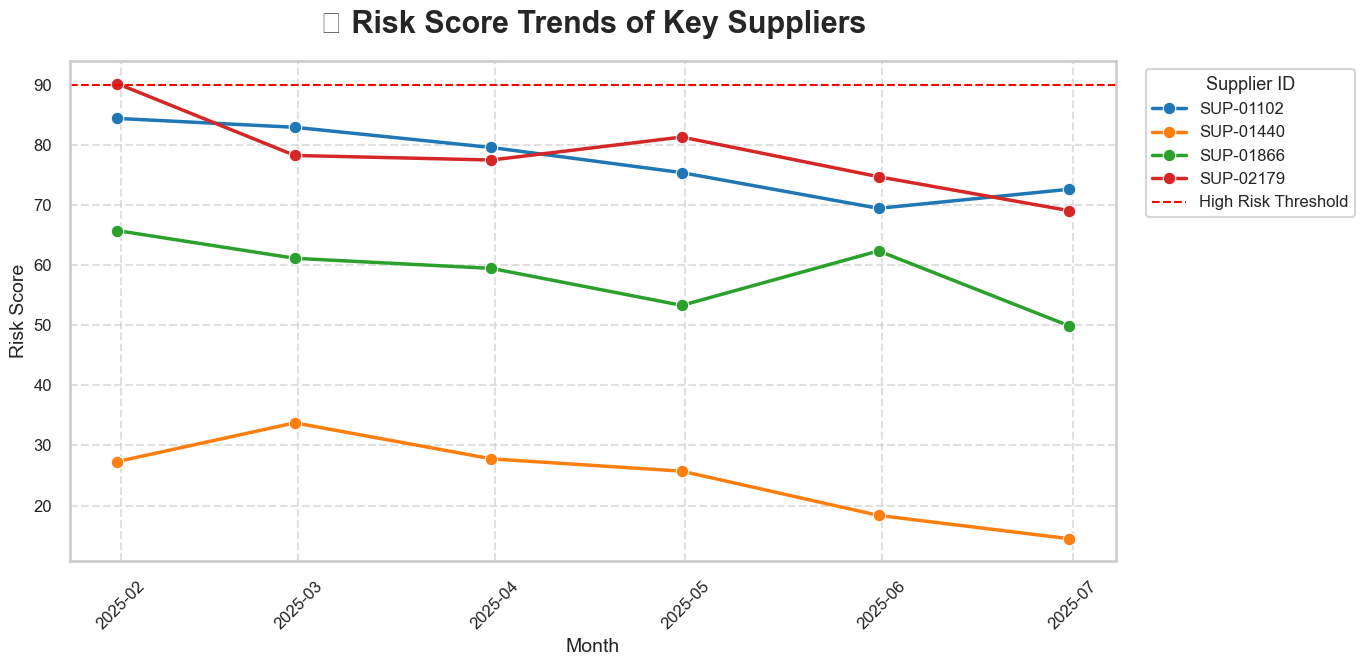

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the enhanced dataset
df = pd.read_csv("supplier_risk_master_data_enhanced.csv")

# Generate a monthly date range for past 6 months
months = pd.date_range(end=pd.Timestamp.today(), periods=6, freq='M')

# Extract supplier IDs
supplier_ids = df["supplier_id"].unique()

# Simulate monthly data for each supplier
simulated_data = []
np.random.seed(42)

for supplier in supplier_ids:
    base_risk = df.loc[df["supplier_id"] == supplier, "risk_score"].values[0]
    base_otd = df.loc[df["supplier_id"] == supplier, "on_time_delivery"].values[0]

    for month in months:
        # Simulate values with controlled random walk
        risk = np.clip(base_risk + np.random.normal(0, 5), 0, 150)
        otd = np.clip(base_otd + np.random.normal(0, 3), 0, 100)

        simulated_data.append({
            "supplier_id": supplier,
            "month": month,
            "risk_score": round(risk, 2),
            "on_time_delivery": round(otd, 2)
        })

        base_risk = risk
        base_otd = otd

# Create DataFrame
sim_df = pd.DataFrame(simulated_data)
sim_df.to_csv("simulated_supplier_trends.csv", index=False)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Set visual theme
sns.set(style="whitegrid", context="talk", palette="muted")

# Pick a few suppliers to highlight
selected_suppliers = df["supplier_id"].sample(4, random_state=42).tolist()
highlight_df = sim_df[sim_df["supplier_id"].isin(selected_suppliers)]

plt.figure(figsize=(14, 7))

# Use seaborn lineplot for smooth lines
sns.lineplot(
    data=highlight_df,
    x="month",
    y="risk_score",
    hue="supplier_id",
    marker="o",
    linewidth=2.5,
    palette="tab10"
)

# Style the chart
plt.title("📉 Risk Score Trends of Key Suppliers", fontsize=22, weight='bold', pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Risk Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=90, color='red', linestyle='--', linewidth=1.5, label='High Risk Threshold')

# Beautify the legend
plt.legend(
    title="Supplier ID",
    title_fontsize='13',
    fontsize='12',
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)

plt.tight_layout()
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_17300\2411138621.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()


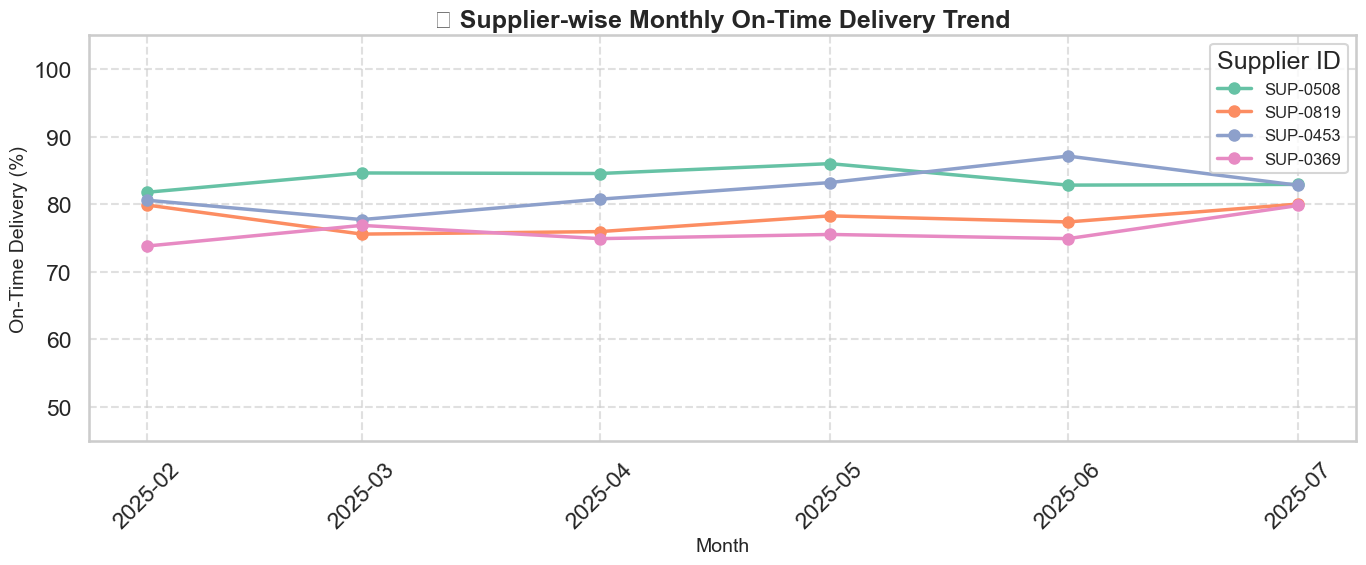

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid", context="talk", palette="Set2")

# Simulate supplier IDs and months
supplier_ids = ['SUP-0508', 'SUP-0819', 'SUP-0453', 'SUP-0369']
months = pd.date_range(start='2025-02-01', periods=6, freq='MS')

# Generate synthetic on-time delivery data
np.random.seed(42)
data = []
for sup in supplier_ids:
    base = np.random.uniform(75, 99)
    for m in months:
        delivery = np.clip(base + np.random.normal(0, 2), 50, 100)
        data.append({
            'Supplier_ID': sup,
            'Month': m,
            'On_Time_Delivery': round(delivery, 2)
        })

on_time_df = pd.DataFrame(data)

# Plot the trend
plt.figure(figsize=(14, 6))
for sup in supplier_ids:
    subset = on_time_df[on_time_df['Supplier_ID'] == sup]
    plt.plot(
        subset['Month'],
        subset['On_Time_Delivery'],
        marker='o',
        linewidth=2.5,
        markersize=8,
        label=f'{sup}'
    )

plt.title("📈 Supplier-wise Monthly On-Time Delivery Trend", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("On-Time Delivery (%)", fontsize=14)
plt.legend(title="Supplier ID", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(45, 105)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [32]:
# Step 1: Filter suppliers with high risk
alerts = sim_df[sim_df["risk_score"] > 90]  # ✅ lowercase

# Step 2: Print alert messages
for _, row in alerts.iterrows():
    print(f"⚠️ ALERT: Supplier {row['supplier_id']} in {row['month'].strftime('%b %Y')} has a HIGH RISK SCORE of {row['risk_score']:.2f}. Immediate review recommended.")

# Optional: Save alerts to CSV
alerts.to_csv("high_risk_supplier_alerts.csv", index=False)


⚠️ ALERT: Supplier SUP-01001 in Jan 2025 has a HIGH RISK SCORE of 93.48. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01001 in Feb 2025 has a HIGH RISK SCORE of 96.72. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01001 in Mar 2025 has a HIGH RISK SCORE of 95.55. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01001 in Apr 2025 has a HIGH RISK SCORE of 103.45. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01001 in May 2025 has a HIGH RISK SCORE of 101.10. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01001 in Jun 2025 has a HIGH RISK SCORE of 98.78. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01024 in Apr 2025 has a HIGH RISK SCORE of 97.84. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01024 in May 2025 has a HIGH RISK SCORE of 108.51. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01024 in Jun 2025 has a HIGH RISK SCORE of 107.75. Immediate review recommended.
⚠️ ALERT: Supplier SUP-01025 in Jun 2025 has a HIGH RISK SCORE of 93.

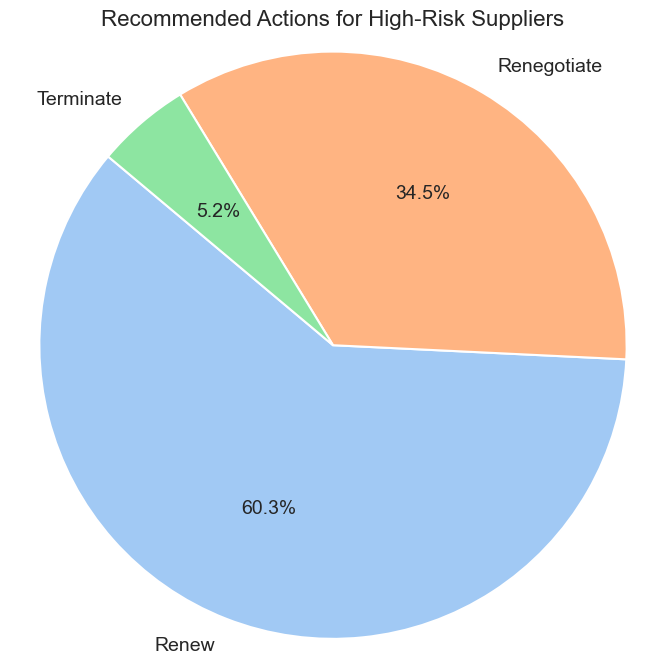


📌 Interpretation:
Terminate: 3 suppliers (5.2%)
Renegotiate: 20 suppliers (34.5%)
Renew: 35 suppliers (60.3%)

🧠 Insight:
If 'Terminate' dominates, the model may be too harsh.
If 'Renew' is high, the model might be too lenient.
A balanced distribution = more nuanced, smarter AI.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
high_risk_suppliers = df[df['risk_score'] > 90]

# Step 1: Check lowercase column name
action_counts = high_risk_suppliers["recommended_action"].value_counts()

# Step 2: Plot pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette("pastel")[0:len(action_counts)]
plt.pie(
    action_counts, 
    labels=action_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    textprops={'fontsize': 14}
)
plt.title("Recommended Actions for High-Risk Suppliers", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Step 3: Interpretation
total = len(high_risk_suppliers)
terminate_count = action_counts.get("Terminate", 0)
renegotiate_count = action_counts.get("Renegotiate", 0)
renew_count = action_counts.get("Renew", 0)

print("\n📌 Interpretation:")
print(f"Terminate: {terminate_count} suppliers ({terminate_count / total * 100:.1f}%)")
print(f"Renegotiate: {renegotiate_count} suppliers ({renegotiate_count / total * 100:.1f}%)")
print(f"Renew: {renew_count} suppliers ({renew_count / total * 100:.1f}%)")

print("\n🧠 Insight:")
print("If 'Terminate' dominates, the model may be too harsh.")
print("If 'Renew' is high, the model might be too lenient.")
print("A balanced distribution = more nuanced, smarter AI.")


In [34]:
# Export the DataFrame with all predictions and analysis
df.to_csv("final_supplier_risk_actions.csv", index=False)
print("✅ Exported as final_supplier_risk_actions.csv")


✅ Exported as final_supplier_risk_actions.csv
